## Visualizing Embeddings Using TSNE

In [1]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE 

import os

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Choukrallah
[nltk_data]     Lachhab\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
# load model
model = KeyedVectors.load_word2vec_format('word2vec_cbow.bin',binary=True)
print(model)

KeyedVectors<vector_size=100, 114701 keys>


### TSNE

t-SNE stands for t-distributed Stochastic Neighbouring Entities. Its a technique used for visualizing high dimensional data by reducing it to a 2 or 3 dimensions.

In [10]:
#Preprocessing our models vocabulary to make better visualizations

words_vocab= list(model.key_to_index) #all the words in the vocabulary. 
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

Size of Vocabulary: 114701
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'was', 'is', 'for', 'on', 'as', 'by', 'with', 'he', 'at', 'from', 'that', 'his', 'it', 'an', 'also', 'were', 'which', 'are', 'this', 'new', 'first', 'be', 'or', 'had', 'one', 'has', 'after', 'their', 'its', 'references', 'who', 'two', 'th', 'not', 'but', 'she', 'her', 'they', 'have', 'other', 'may', 'all', 'been', 'time', 'school']


In [11]:
#Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])
#The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words

Size of Vocabulary without stopwords: 113052
Few words in Vocabulary without stopwords ['references', 'time', 'school', 'year', 'american', 'external', 'links', 'national', 'university', 'world', 'season', 'team', 'united', 'born', 'state', 'city', 'st', 'years', 'september', 'film', 'south', 'june', 'john', 'states', 'october', 'august', 'july', 'league', 'history', 'april']


In [12]:
#With the increase in the amount of data, it becomes more and more difficult to visualize and interpret
#In practice, similar words are combined into groups for further visualization.

keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)#apending access vector of all similar words
    word_clusters.append(words)#appending list of all smiliar words

In [16]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [ 7.08319128e-01 -2.23367333e+00  3.23143274e-01 -5.50189316e-01
 -1.40486825e+00 -9.77846563e-01  1.58263695e+00  2.35746980e+00
  6.29574716e-01 -9.62057889e-01  3.10981691e-01 -6.83208585e-01
  6.59746349e-01 -1.89578617e+00  3.05843568e+00 -5.39790690e-01
 -4.36874628e+00 -2.51359034e+00  5.67408860e-01  1.13733120e-01
  6.87837720e-01  6.40369892e-01  1.45047116e+00 -9.39432204e-01
 -3.07816553e+00 -3.52297950e+00  8.93822610e-01  1.07860994e+00
 -6.13695681e-01 -2.77063394e+00 -1.61546385e+00  1.06621277e+00
 -3.30512762e+00  4.11730051e+00  5.30193925e-01 -4.42316830e-01
 -9.46861804e-01 -3.65201473e+00 -2.76923060e+00  3.22132039e+00
  3.21173549e-01  4.92537594e+00  1.26362264e+00 -1.08148897e+00
  2.87822127e+00  3.29670835e+00  3.95711780e-01 -3.24736595e+00
 -2.01295733e+00  2.02284396e-01  3.89295936e+00  2.43469262e+00
  2.34745789e+00 -1.67521393e+00  1.09954929e+00  3.40705365e-01
 -1.36051667e+00 -1.88466012e+00  2.55906487e+00 -1.34602165e+00
 -5.5

In [17]:
from sklearn.manifold import TSNE
import numpy as np

In [24]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape #geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d

## Hyperparameters of TSNE :
- **n_components:** The number of components, i.e., the dimension of the value space
- **perplexity:** The number of effective neighbours
- **n_iter:** Maximum number of iterations for the optimization.
- **init:** Initialization of embedding.

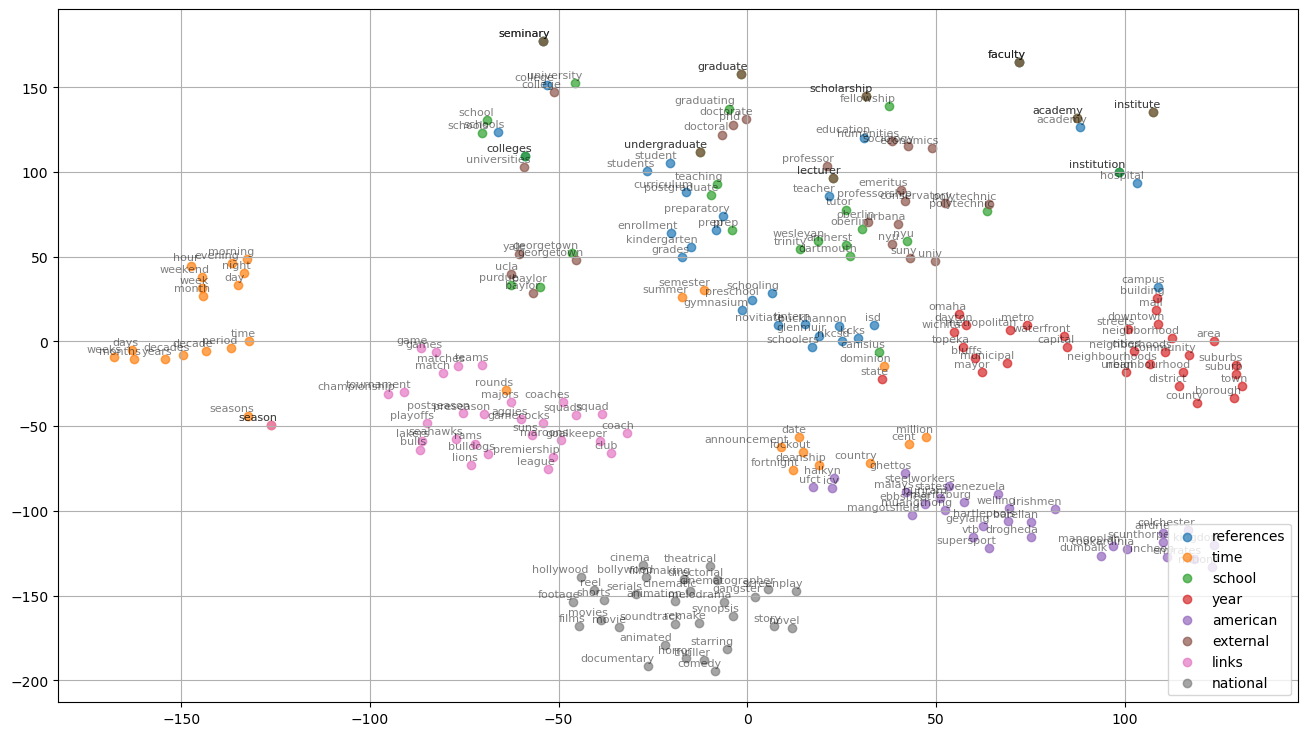

In [27]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline  

#script for constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    

    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

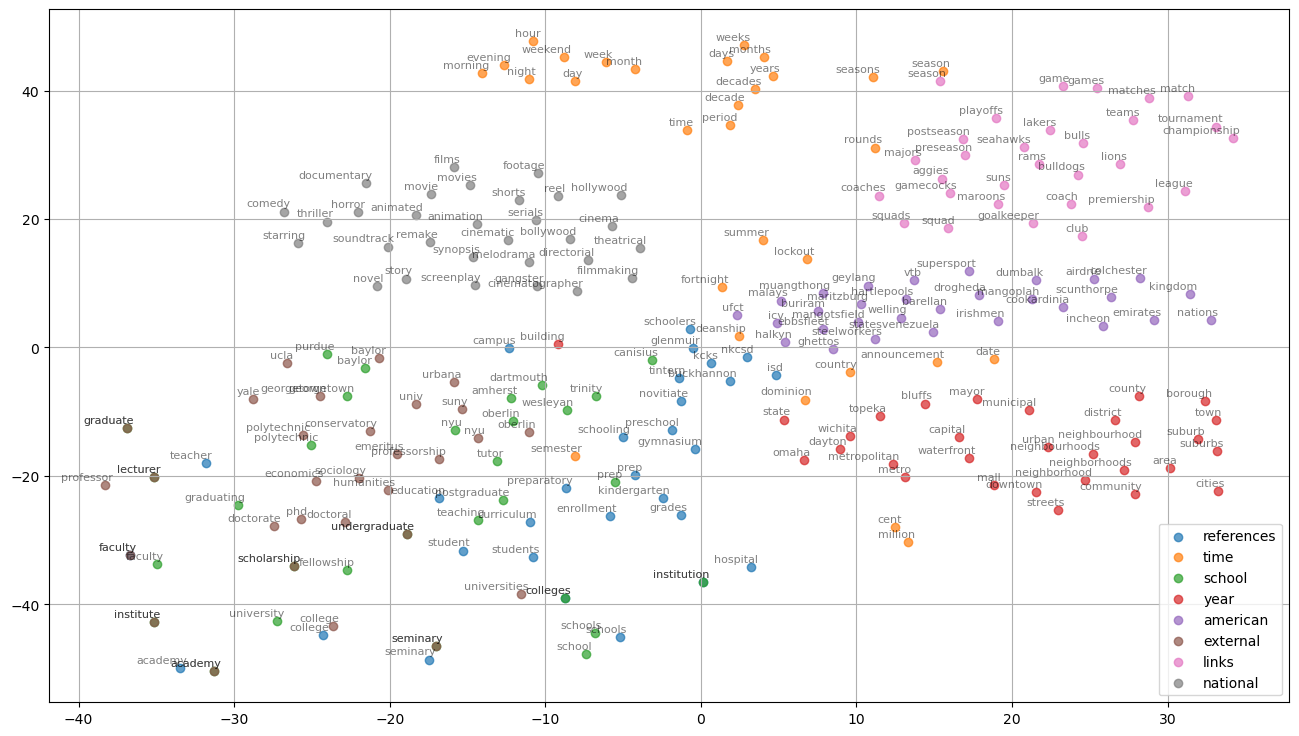

In [28]:
tsne_model_en_2d = TSNE(perplexity=25, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

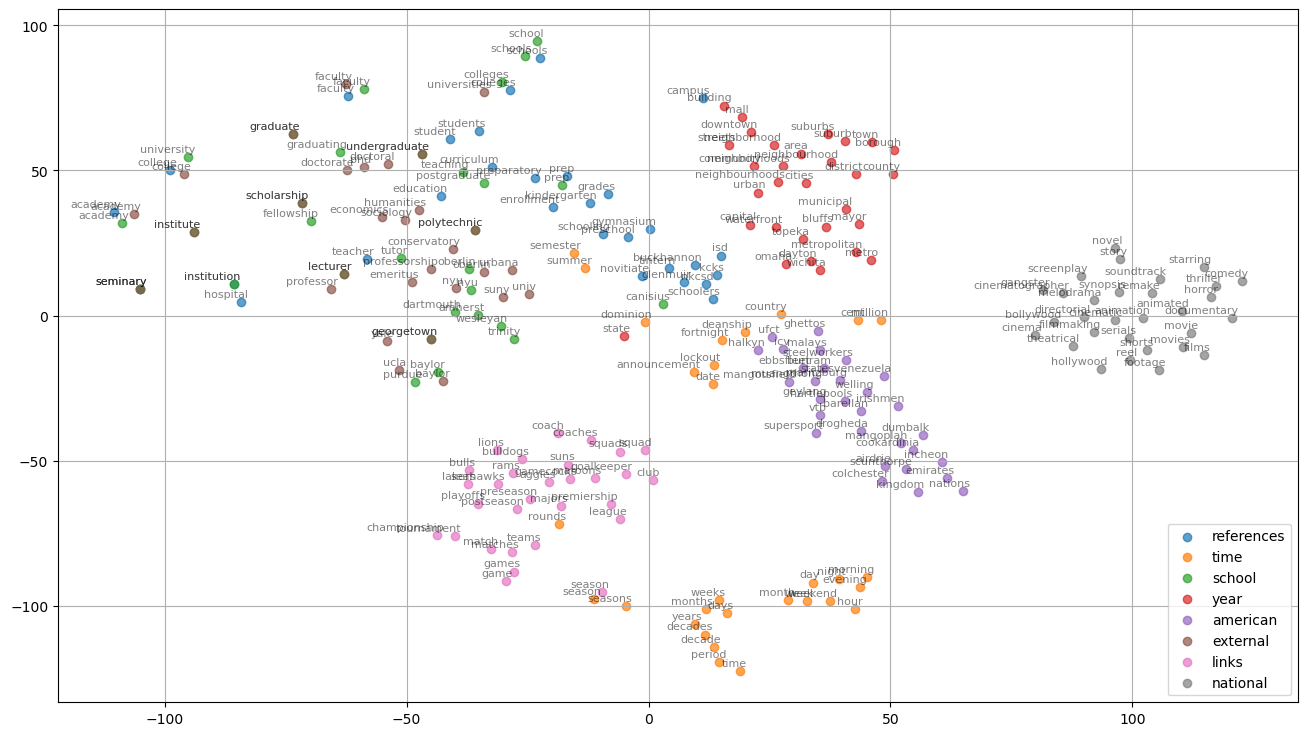

In [29]:
tsne_model_en_2d = TSNE(perplexity=10, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)